In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

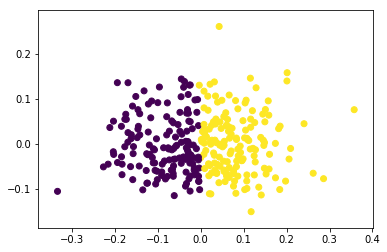

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

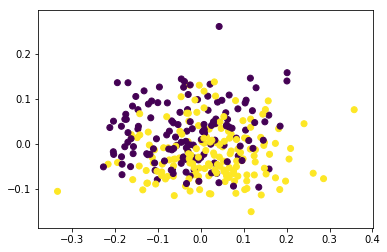

In [23]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

In [6]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0       21  154
1      128    0


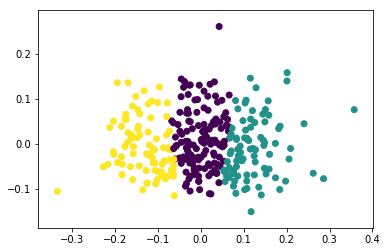

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33
[0 2 0 1 1 1 0 2 0 1 1 2 0 0 1 1 0 0 2 0 0 0 2 1 0 0 2 0 0 0 0 0 2 0 1 1 0
 2 2 0 0 1 0 1 2 0 0 0 2 1 1 1 2 1 0 2 0 1 0 0 2 1 0 2 0 2 1 1 2 0 0 0 2 0
 1 2 0 2 1 2 0 0 2 0 2 1 0 0 0 0 2 1 0 1 0 0 0 0 1 1 0 1 2 2 1 2 1 0 2 0 2
 0 1 2 2 0 1 1 2 0 0 2 0 0 0 1 0 2 1 1 0 0 1 0 1 0 1 2 0 0 1 0 1 2 0 0 2 0
 2 2 0 2 2 0 2 2 0 2 0 2 1 2 1 2 0 1 1 2 2 1 2 0 0 2 0 2 0 0 2 0 0 2 1 0 0
 1 1 0 0 0 1 2 0 2 0 2 0 0 0 2 0 2 1 2 1 2 2 0 0 0 1 1 1 1 0 1 1 0 2 0 0 0
 1 2 0 1 0 0 0 0 1 2 1 2 1 2 2 0 0 2 0 2 0 0 0 2 0 2 1 0 0 0 2 2 2 1 0 0 0
 0 0 2 1 1 1 2 1 0 1 1 0 0 2 1 1 1 0 0 1 0 2 0 0 1 1 2 0 0 1 0 1 2 1 1 0 1
 0 0 2 1 1 1 1]


In [21]:
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))
print(y_pred)

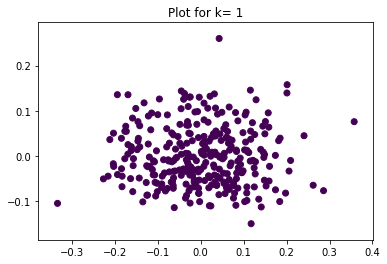

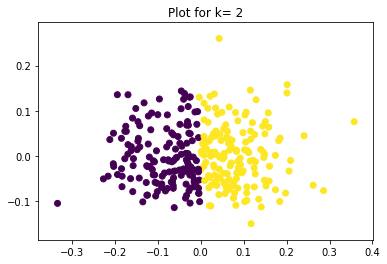

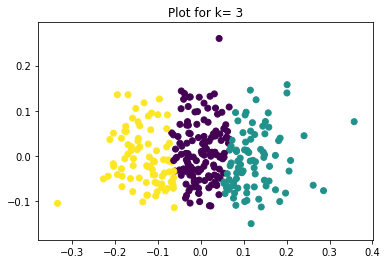

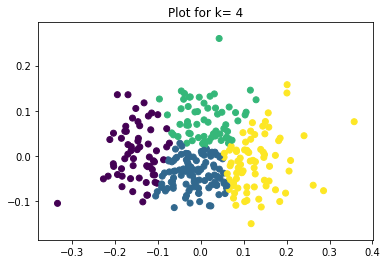

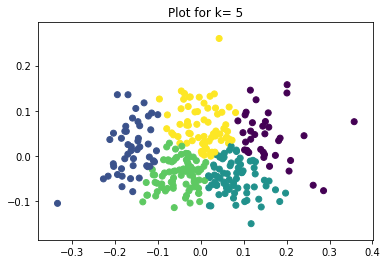

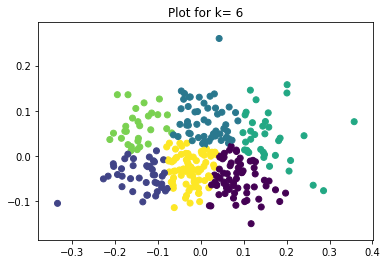

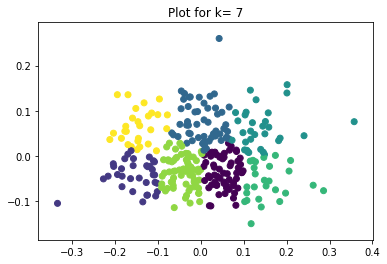

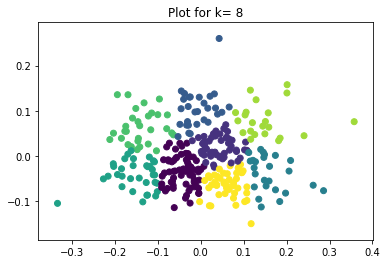

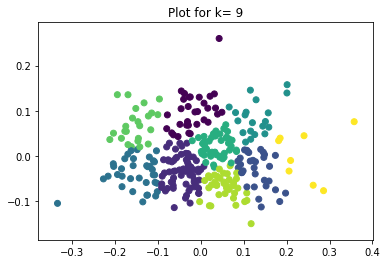

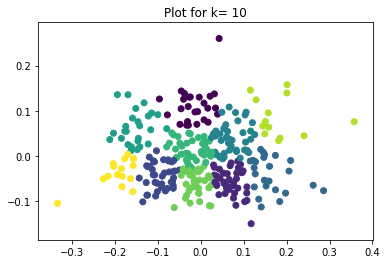

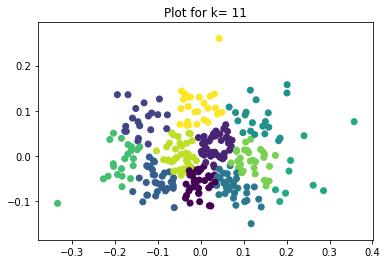

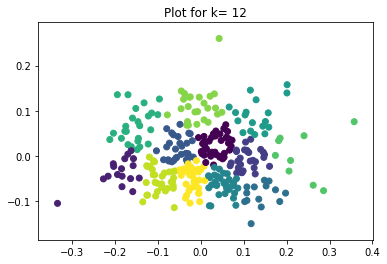

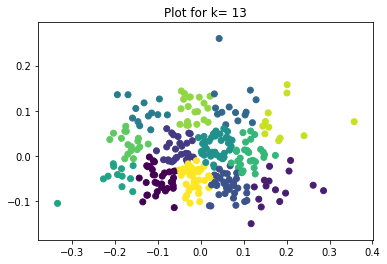

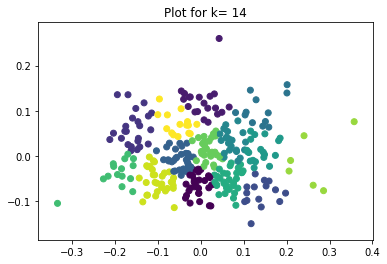

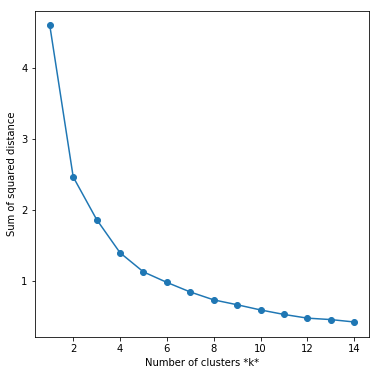

In [28]:
from sklearn.metrics import accuracy_score
sse = []
centers = []
for val in range(1,15):
    km = KMeans(n_clusters=val, random_state=42)
    y_pred = km.fit_predict(X_pca)
    sse.append(km.inertia_)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    plt.title("Plot for k= {}".format(val))
    plt.show()
    
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list(range(1, 15)), sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

    #print('Comparing k-means clusters against the data:')
    #print(pd.crosstab(y_pred, y))